In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
#Reading the dataset

customer_churn_dataset = pd.read_csv('/content/Customer Churn.csv')

In [40]:
#Viewing the top 5 rows of the dataset

customer_churn_dataset.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [41]:
customer_churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [42]:
customer_churn_dataset.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [43]:
print(customer_churn_dataset.isnull().sum())

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [44]:
#Define features and target variable

#Features
X = customer_churn_dataset.drop(columns=["Churn"])

#Target
y = customer_churn_dataset["Churn"]

In [45]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
#Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.218734
         Iterations 10


In [48]:
#Print detailed summary
print(log_result.summary2())

                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    Churn             Pseudo R-squared:  0.497      
Date:                  2025-03-18 04:32  AIC:               1130.4190  
No. Observations:      2520              BIC:               1212.0672  
Df Model:              13                Log-Likelihood:    -551.21    
Df Residuals:          2506              LL-Null:           -1096.0    
Converged:             1.0000            LLR p-value:       1.0366e-224
No. Iterations:        10.0000           Scale:             1.0000     
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   -2.6649   0.8711 -3.0593 0.0022 -4.3722 -0.9576
Call  Failure            0.1341   0.0200  6.7011 0.0000  0.0949  0.1733
Complains            

In [52]:
#odds ratios
odds_ratios = np.exp(log_result.params)

#standard deviation of original (unscaled) features
feature_std_dev = customer_churn_dataset.drop(columns=["Churn"]).std()

#standardized coefficients
std_coeffs = log_result.params[1:] * feature_std_dev  #Exclude intercept

#Create feature importance dataframe
feature_importance = pd.DataFrame({
    "Feature": customer_churn_dataset.drop(columns=["Churn"]).columns,
    "Odds Ratio": odds_ratios[1:],  #Exclude intercept
    "Std Coeff": std_coeffs
}).sort_values(by="Std Coeff", ascending=False)  # Sort by standardized coefficient importance

#Display feature importance
print("\nLogistic Regression Feature Importance (Sorted by Std Coeff):")
print(feature_importance)


Logistic Regression Feature Importance (Sorted by Std Coeff):
                                         Feature  Odds Ratio  Std Coeff
Customer Value                    Customer Value    1.007750   3.991348
Complains                              Complains   50.688357   1.043651
Call  Failure                      Call  Failure    1.143478   0.973905
Status                                    Status    4.074705   0.606969
Seconds of Use                    Seconds of Use    1.000122   0.511594
Age Group                              Age Group    1.221872   0.178854
Tariff Plan                          Tariff Plan    1.626533   0.130303
Age                                          Age    0.991132  -0.078666
Distinct Called Numbers  Distinct Called Numbers    0.990897  -0.157445
Subscription  Length        Subscription  Length    0.965856  -0.297843
Charge  Amount                    Charge  Amount    0.657489  -0.637826
Frequency of use                Frequency of use    0.944268  -3.292371
F

In [53]:
# Logistic Regression Predictions
y_pred_prob = log_result.predict(sm.add_constant(X_test))
y_pred_log = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix & Classification Report
print("\nLogistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
[[520  11]
 [ 58  41]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.79      0.41      0.54        99

    accuracy                           0.89       630
   macro avg       0.84      0.70      0.74       630
weighted avg       0.88      0.89      0.88       630



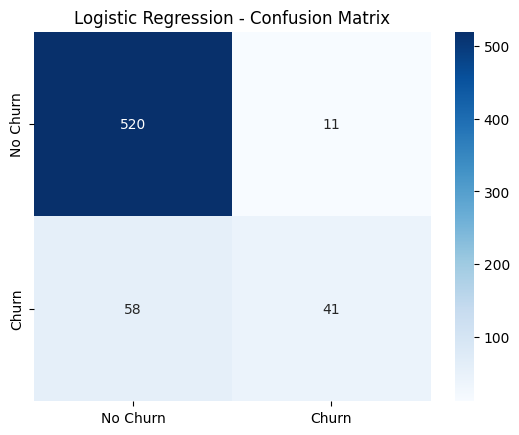

In [54]:
# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:

#Get feature importances
rf_importance = pd.DataFrame({
    "Feature": customer_churn_dataset.drop(columns=["Churn"]).columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [59]:
#Predict on test data
y_pred_rf = rf_model.predict(X_test)
print("\nConfusion Matrix-Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report-Random Forest:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix-Random Forest:
[[521  10]
 [ 14  85]]

Classification Report-Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.89      0.86      0.88        99

    accuracy                           0.96       630
   macro avg       0.93      0.92      0.93       630
weighted avg       0.96      0.96      0.96       630



                    Feature  Importance
1                 Complains    0.187999
4            Seconds of Use    0.125854
10                   Status    0.121776
2      Subscription  Length    0.119341
5          Frequency of use    0.110457
7   Distinct Called Numbers    0.076977
12           Customer Value    0.076954
0             Call  Failure    0.060004
6          Frequency of SMS    0.051531
8                 Age Group    0.028122
11                      Age    0.026618
3            Charge  Amount    0.013153
9               Tariff Plan    0.001215


<ipython-input-60-6f1d906eb619>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




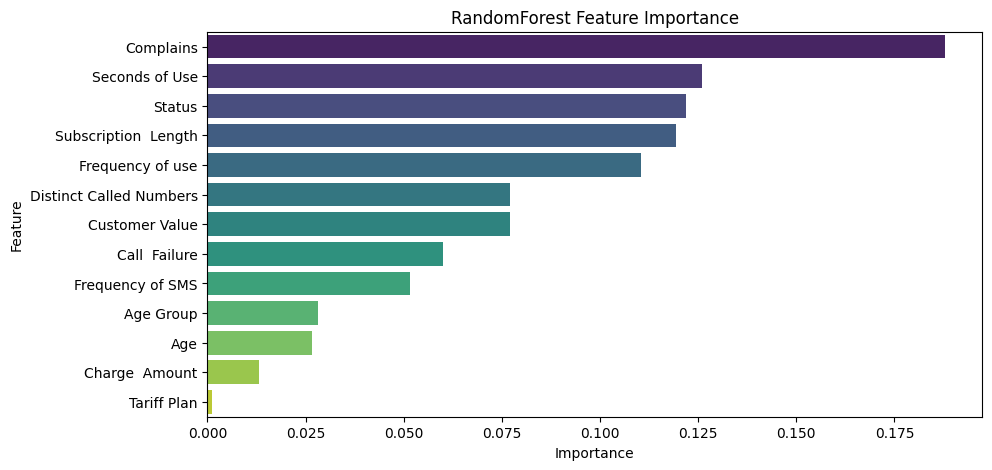

In [60]:
print(rf_importance)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=rf_importance, palette="viridis")
plt.title("RandomForest Feature Importance")
plt.show()

In [62]:
#Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)


Random Forest Performance:
[[521  10]
 [ 14  85]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.89      0.86      0.88        99

    accuracy                           0.96       630
   macro avg       0.93      0.92      0.93       630
weighted avg       0.96      0.96      0.96       630



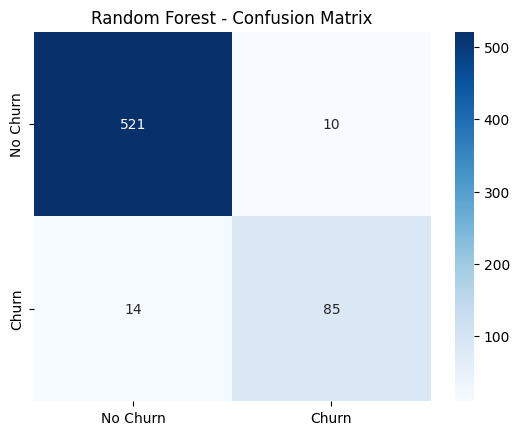

In [63]:
#Confusion Matrix & Classification Report
print("\nRandom Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [64]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/

In [ ]:
import os
os._exit(00)  # This will restart the runtime


In [25]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show


In [78]:
#Train EBM model
ebm_model = ExplainableBoostingClassifier(random_state=42)
ebm_model.fit(X_train, y_train)


ExplainableBoostingClassifier()

In [79]:
from interpret import show
show(ebm_model.explain_global())

In [80]:
show(ebm_model.explain_local(X_test[:5], y_test[:5]), 0)

In [81]:
# EBM Predictions
y_pred_ebm = ebm_model.predict(X_test)


In [82]:
# Confusion Matrix & Classification Report
print("\nEBM Model Performance:")
print(confusion_matrix(y_test, y_pred_ebm))
print(classification_report(y_test, y_pred_ebm))




EBM Model Performance:
[[516  15]
 [ 10  89]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       531
           1       0.86      0.90      0.88        99

    accuracy                           0.96       630
   macro avg       0.92      0.94      0.93       630
weighted avg       0.96      0.96      0.96       630



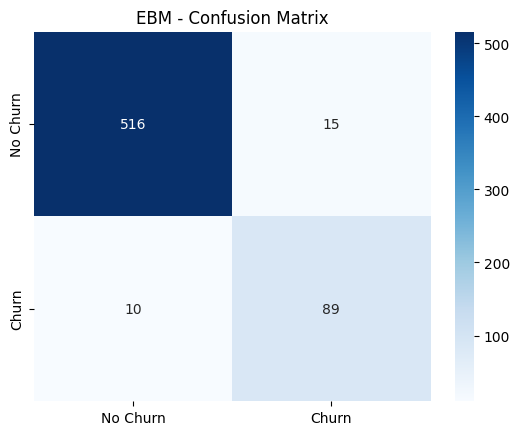

In [83]:
# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_ebm), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("EBM - Confusion Matrix")
plt.show()
